# **TTI109 - Estatística**
# **Laboratório 02 - Estatística Descritiva 1**
# **Distribuição de Frequências**

Nessa aula vamos aprender a construir:

* Classes para descrever uma distribuição de dados;
* Tabelas de frequências;
* Histogramas;
* Polígonos de frequências.

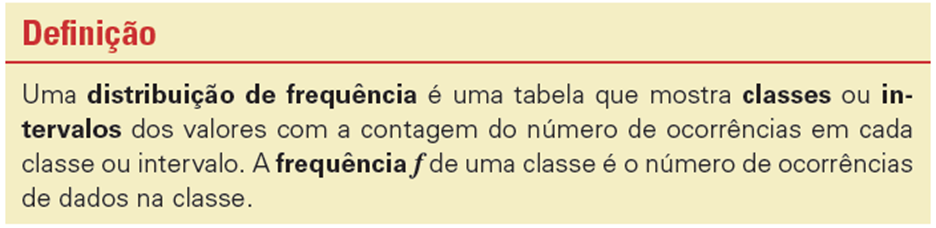

## **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em US$) de 30 aparelhos GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

```Python
128 100 180 150 200  90 340 105  85 270
200  65 230 150 150 120 130  80 230 200
110 126 170 132 140 112  90 340 170 190
```

In [44]:
# Importa a biblioteca Pandas
import pandas as pd

# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105,  85, 270,
200,  65, 230, 150, 150, 120, 130,  80, 230, 200,
110, 126, 170, 132, 140, 112,  90, 340, 170, 190])

# Exibindo as primeiras linhas do DataFrame
print(data.head())

# Exibindo informações do DataFrame
print(data.info())

# Exibindo estatísticas descritivas
print(data.describe())

0    128
1    100
2    180
3    150
4    200
dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: None
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 372.0 bytes
None
count     30.000000
mean     159.433333
std       69.835612
min       65.000000
25%      110.500000
50%      145.000000
75%      197.500000
max      340.000000
dtype: float64


Para extrair os valores de máximo e de mínimo da nossa série de dados em Pandas, utilizamos os métodos `max` e `min` e guardamos os resultados em duas variáveis:

```Python
# Valores máximo e mínimo
v_max = data.max()
v_min = data.min()
```

In [45]:
# Valores máximo e mínimo

v_max = data.max()
v_min = data.min()
# Número de classes definido pelo problema
n_classes = 7

print(f'Valor mínimo da distribuição = {data.min()}')
print(f'Valor máximo da distribuição = {data.max()}')

Valor mínimo da distribuição = 65
Valor máximo da distribuição = 340


## **Distribuição de Frequências**

O método `value_counts` registra a frequência de ocorrência dos dados em cada classe.

O número de classes é dado pelo parâmetro `bins`.

O método `sort_index` ordena os índices (classes) em ordem crescente.

```Python
dist_freq = data.value_counts(bins = n_classes).sort_index()
```

In [46]:
# Distribuição de frequências

#  COM ESSE METODO, JA CRIMAOS A TABELINHA  

dist_freq = data.value_counts(bins=n_classes).sort_index()
# Print
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
Name: count, dtype: int64


#### Note que as classes da distribuição de frequências não estão definidas de forma "amigável".
Vamos executar o passos seguintes e fornecer os valores de mínimo, máximo e aplitude de classe:
- Converter o "Pandas Series" para "Pandas DataFrame"
- Resetar os índices do DataFrame
- Renomear as colunas do DataFrame
- Calcular a amplitude de classe
- Alterar os intervalos de classe usando o método `interval_range`
- Finalmente, atribuir os intervalos para a coluna Classe

```Python
# Converter o "Pandas Series" para "Pandas DataFrame"
nova_dist_freq = pd.DataFrame(dist_freq)

# Resetar os índices do DataFrame
nova_dist_freq = nova_dist_freq.reset_index()

# Renomear as colunas do DataFrame
nova_dist_freq.columns = ['Classe', 'Frequência']
```

In [47]:
# Converter o "Pandas Series" para "Pandas DataFrame"
nova_dist_freq = pd.DataFrame(dist_freq)
# Print
display(nova_dist_freq)

,count
"(64.72399999999999, 104.286]",6
"(104.286, 143.571]",9
"(143.571, 182.857]",6
"(182.857, 222.143]",4
"(222.143, 261.429]",2
"(261.429, 300.714]",1
"(300.714, 340.0]",2


In [48]:
# Resetar os índices do DataFrame
nova_dist_freq = nova_dist_freq.reset_index()
# Print
display(nova_dist_freq)

,index,count
0,"(64.72399999999999, 104.286]",6
1,"(104.286, 143.571]",9
2,"(143.571, 182.857]",6
3,"(182.857, 222.143]",4
4,"(222.143, 261.429]",2
5,"(261.429, 300.714]",1
6,"(300.714, 340.0]",2


In [49]:
# Renomear as colunas do DataFrame
nova_dist_freq.columns = ['Classe', 'Frequência']
# Print
display(nova_dist_freq)

,Classe,Frequência
0,"(64.72399999999999, 104.286]",6
1,"(104.286, 143.571]",9
2,"(143.571, 182.857]",6
3,"(182.857, 222.143]",4
4,"(222.143, 261.429]",2
5,"(261.429, 300.714]",1
6,"(300.714, 340.0]",2


#### Recordando...

São 7 classes (fornecido pelo problema):
- Valor mínimo = 65
- Valor máximo = 340
- Amplitude da distribuição (h): 340 – 65 = 275
- Amplitude de classe: h = 275/7 = 39,29
- Arredondando para o inteiro mais próximo: h = 39

```Python
# Calcular a amplitude de classe
amplitude = round( (v_max - v_min) / n_classes )

# Alterar os intervalos de classe usando o método interval_range
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude)

# Atribuir os intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
```

In [50]:
# Calcular a amplitude de classe
amplitude = round( (v_max - v_min) / n_classes )
print('Amplitude calculada:', amplitude)

# Alterar os intervalos de classe usando o método interval_range
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude)

# Atribuir os intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos

# Print
print(intervalos)

Amplitude calculada: 39
IntervalIndex([ (65, 104], (104, 143], (143, 182], (182, 221], (221, 260],
               (260, 299], (299, 338]],
              dtype='interval[int64, right]')


In [51]:
# Atribuir os intervalos para a coluna Classe

# Print
display(nova_dist_freq)

,Classe,Frequência
0,"(65, 104]",6
1,"(104, 143]",9
2,"(143, 182]",6
3,"(182, 221]",4
4,"(221, 260]",2
5,"(260, 299]",1
6,"(299, 338]",2


#### Temos um problema!

**Observe que temos um problema aqui! Ao arredondar a amplitude de classe (h) para 39, os valores finais ficaram de fora da última classe!**

Precisamos arredondar h para 40 e garantir que o Python gere a última classe por completo!

```Python
# Calcular a amplitude de classe
from math import ceil
amplitude = ceil( (v_max - v_min) / n_classes )

print('Amplitude calculada:', amplitude)

# Alterar os intervalos de classe usando o método interval_range
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude)

# Atribuir os intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
```

In [52]:
# Calcular a amplitude de classe
from math import ceil

amplitude = ceil((v_max - v_min) / n_classes)
print(v_max, v_min, n_classes)
print('Amplitude calculada:', amplitude)

# Alterar os intervalos de classe usando o método interval_range

intervalos = pd.interval_range(start=v_min, end = v_max, freq=amplitude)

# Print
print(intervalos)

# Atribuir os intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
# Print
display(nova_dist_freq)

340 65 7
Amplitude calculada: 40
IntervalIndex([(65, 105], (105, 145], (145, 185], (185, 225], (225, 265],
               (265, 305]],
              dtype='interval[int64, right]')


ValueError: Length of values (6) does not match length of index (7)

#### Temos mais um problema!

Observe que o Python retorna um erro:

`ValueError: Length of values (6) does not match length of index (7)`

O problema ocorre porque o método `interval_range` não inclui automaticamente o valor máximo no intervalo final quando se usa o parâmetro freq para definir a amplitude dos intervalos. Isso pode resultar em um número de classes inferior ao esperado.

Para corrigir isso, podemos ajustar o valor final `end` para garantir que o intervalo final inclua o valor máximo ou aumentar o valor de end ligeiramente para acomodar todos os valores em 7 intervalos.

* `end_corrigido`: Ajustamos o valor final do intervalo `end_corrigido` para garantir que ele seja suficiente para incluir o valor máximo e gerar exatamente 7 classes.
* `interval_range`: O método `interval_range` agora utiliza `end_corrigido`, garantindo que o valor máximo seja coberto e que sejam geradas 7 classes.
Este ajuste garantirá que os intervalos sejam criados corretamente, abrangendo todos os dados, e que o número de classes seja exatamente igual ao especificado.

```Python
# Calcular a amplitude de classe
from math import ceil
amplitude = ceil( (v_max - v_min) / n_classes )

print('Amplitude calculada:', amplitude)

# Corrigir o valor final do intervalo para incluir o valor máximo
end_corrigido = v_min + amplitude * n_classes

# Alterar os intervalos de classe usando o método interval_range
intervalos = pd.interval_range(start=v_min, end=end_corrigido, freq=amplitude)

# Atribuir os intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
```

In [53]:
# Calcular a amplitude de classe
from math import ceil
print('Amplitude calculada:', amplitude)

# Corrigir o valor final do intervalo para incluir o valor máximo
end_corrigido = v_min + amplitude * n_classes
# Alterar os intervalos de classe usando o método interval_range
intervalos = pd.interval_range(start=v_min, end= end_corrigido, freq=amplitude)
# Print
print(intervalos)

# Atribuir os intervalos para a coluna Classe
nova_dist_freq["Classe"] = intervalos
# Print
display(nova_dist_freq)

Amplitude calculada: 40
IntervalIndex([ (65, 105], (105, 145], (145, 185], (185, 225], (225, 265],
               (265, 305], (305, 345]],
              dtype='interval[int64, right]')


,Classe,Frequência
0,"(65, 105]",6
1,"(105, 145]",9
2,"(145, 185]",6
3,"(185, 225]",4
4,"(225, 265]",2
5,"(265, 305]",1
6,"(305, 345]",2


## **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibem os pontos médios, a frequência relativa e a frequência acumulada de cada classe da distribuição.
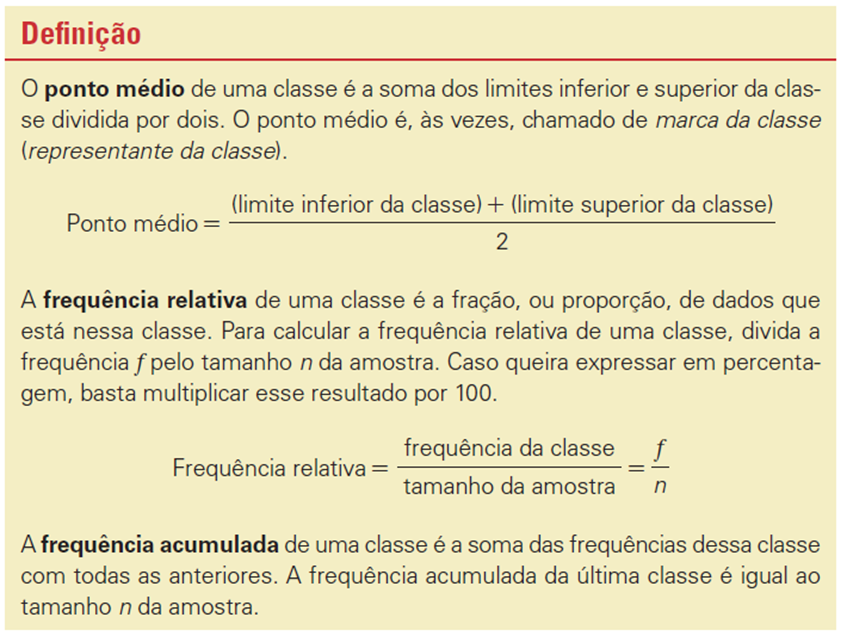
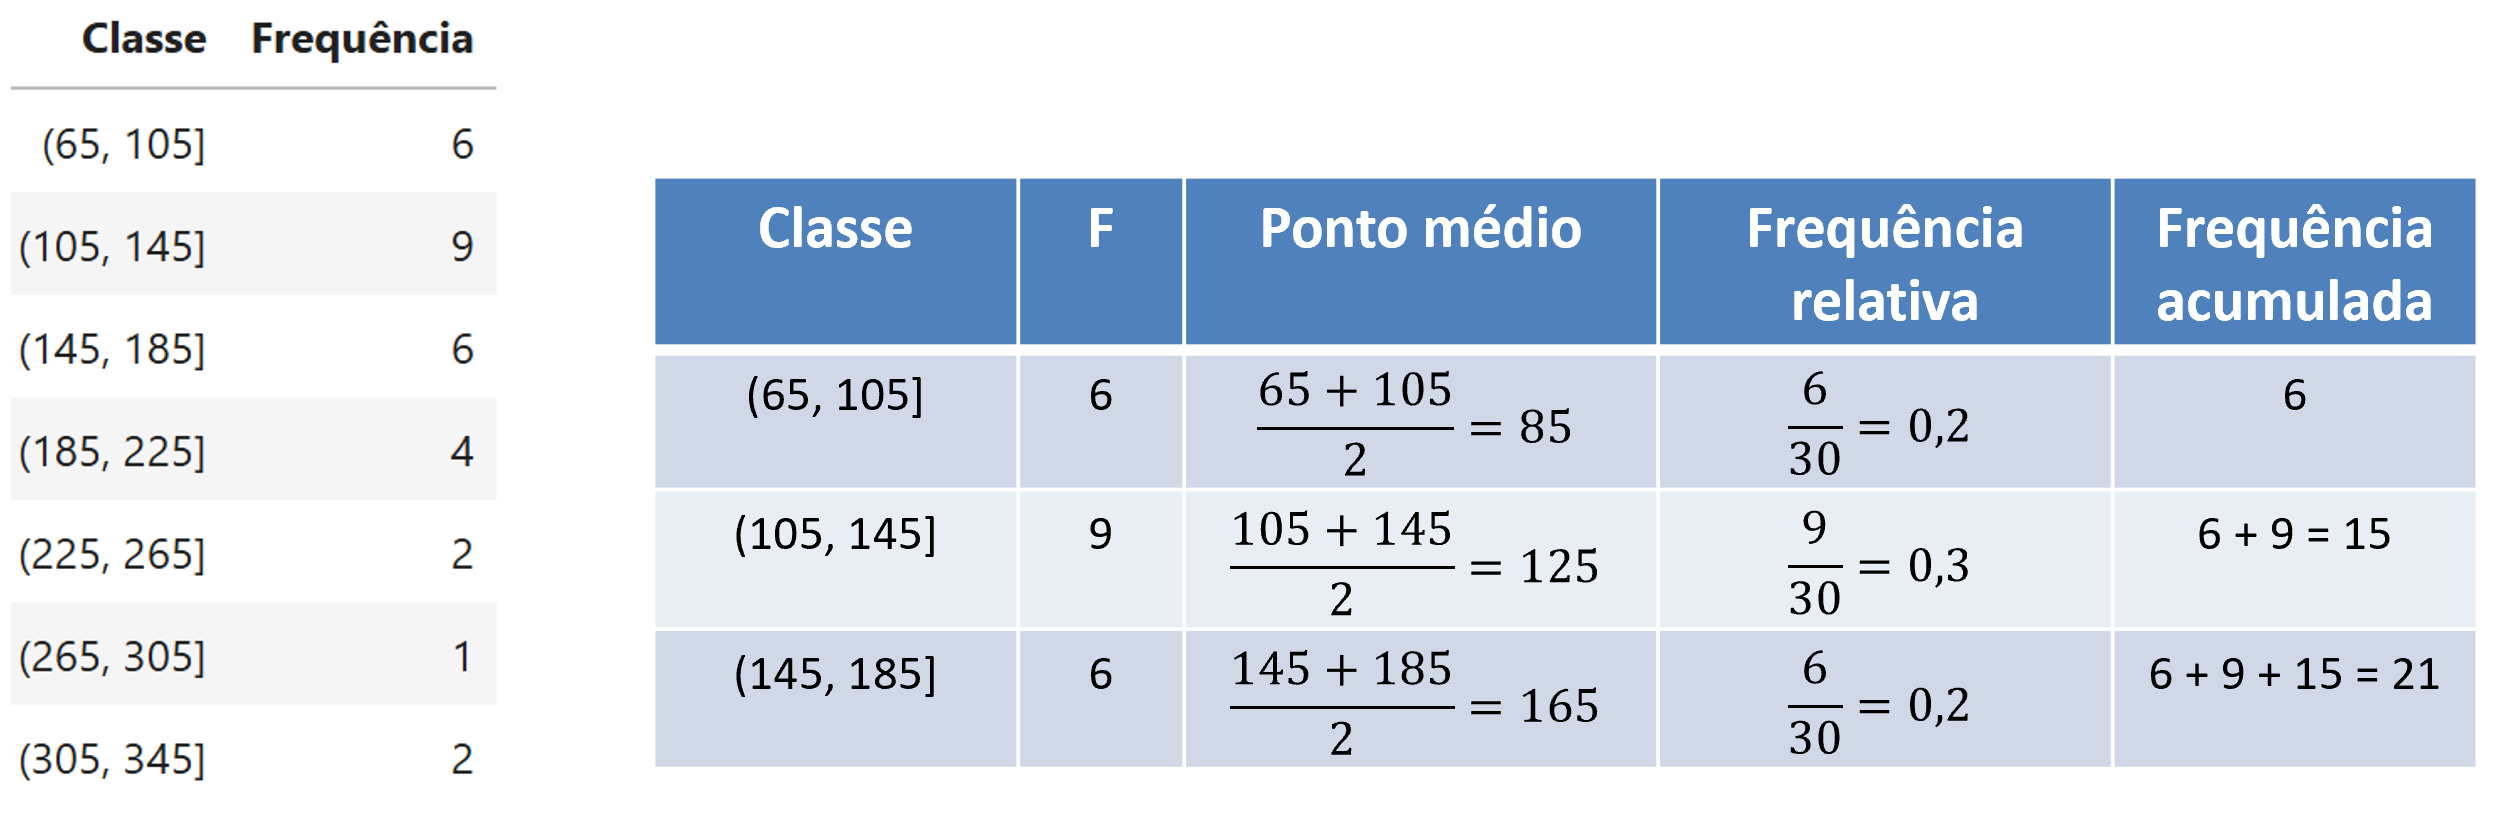
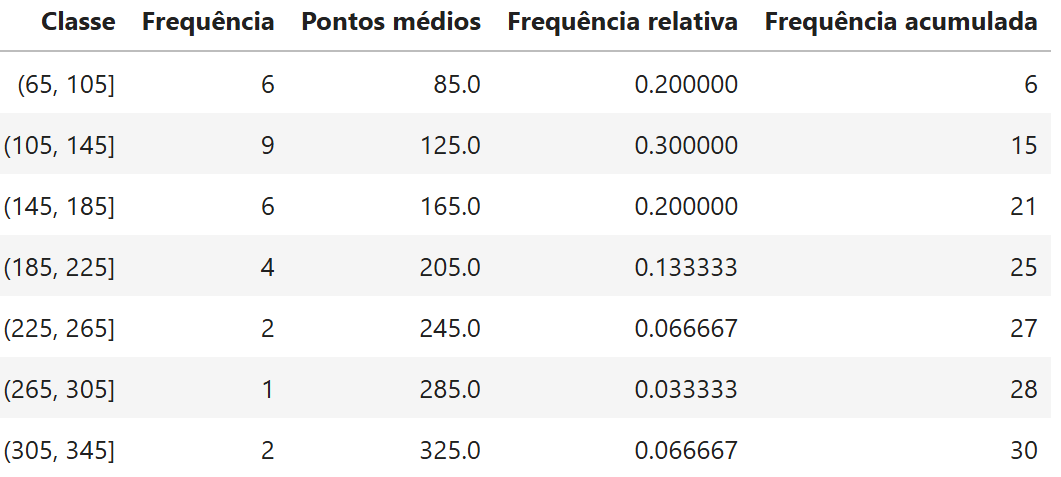

```Python
# Cálculo dos pontos médios das classe
pts_medios = []
for intervalo in intervalos:
    pts_medios.append(intervalo.mid)

# Segunda forma opcional de declarar o mesmo código, mas de forma concisa em uma única linha
pts_medios = [inter.mid for intervalo in intervalos]

# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios

# Cálculo do número de observações equivale à somatória das frequências ou contar o número total de elementos
observacoes = len(data)

# Cálculo e inserção da coluna de frequência relativa
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes

# Cálculo e inserção da coluna de frequência acumulada
# A função 'cumsum' faz a soma acumulada
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()
```

In [54]:
# Cálculo dos pontos médios das classe
pts_medios = []
for x in intervalos:
    pts_medios.append(x.mid)
# Print
print(pts_medios)

[np.float64(85.0), np.float64(125.0), np.float64(165.0), np.float64(205.0), np.float64(245.0), np.float64(285.0), np.float64(325.0)]


In [57]:

# Inserção da coluna Pontos médios
nova_dist_freq['Pontos Médios'] = pts_medios
# Print
display(nova_dist_freq)

# Cálculo do número de observações equivale à somatória das frequências ou contar o número total de elementos
observacoes = len(data)

# Cálculo e inserção da coluna de frequência relativa
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes

# Cálculo e inserção da coluna de frequência acumulada
# A função 'cumsum' faz a soma acumulada
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()

,Classe,Frequência,Pontos Médios,Frequência relativa,Frequência acumulada
0,"(65, 105]",6,85.0,0.200000,6
1,"(105, 145]",9,125.0,0.300000,15
2,"(145, 185]",6,165.0,0.200000,21
3,"(185, 225]",4,205.0,0.133333,25
4,"(225, 265]",2,245.0,0.066667,27
5,"(265, 305]",1,285.0,0.033333,28
6,"(305, 345]",2,325.0,0.066667,30


## **Construção do histograma de frequências**

O histograma é construído usando o método `hist` do `Pandas`. Diversas características do histograma, tais como as classes (parâmetro `bins`), cor das barras e marcações nos eixos vertical e horizontal são programáveis.

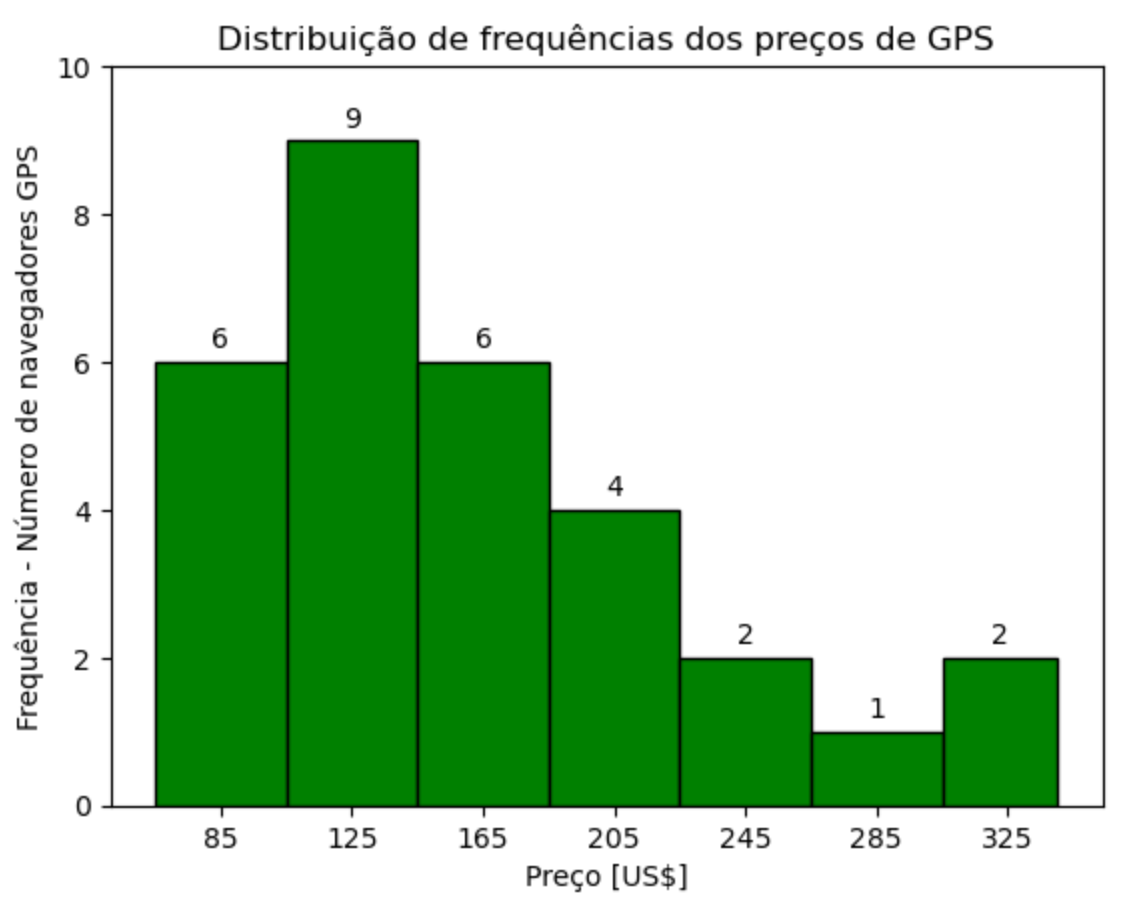

```Python
# Importa a biblioteca
import matplotlib.pyplot as plt

# Construção do histograma
# Define os limites das classes (bins) usando os intervalos
# Inicializa uma lista vazia para armazenar os limites das classes
classes = []

# Adiciona o limite esquerdo de cada intervalo à lista de classes
for inter in intervalos:
    classes.append(inter.left)

# Adiciona o valor máximo à lista de classes
classes.append(v_max)

# Cria o histograma
histograma = data.hist(
    bins=classes,
    color='blue',
    edgecolor='black',
    grid=False
)

# Novamente, podemos escrever o código anterior em uma única linha
# histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max], color='blue', edgecolor='black', grid=False)

# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência - Número de navegadores GPS',
               title='Distribuição de frequências dos preços de GPS',
               xticks=nova_dist_freq['Pontos médios'],
               yticks=range(0, nova_dist_freq['Frequência'].max()+2, 2))

plt.show()
```

In [29]:
# Importa a biblioteca
import matplotlib.pyplot as plt

# Construção do histograma
# Define os limites das classes (bins) usando os intervalos
# Inicializa uma lista vazia para armazenar os limites das classes

# Adiciona o limite esquerdo de cada intervalo à lista de classes

# Adiciona o valor máximo à lista de classes

# Cria o histograma

# Novamente, podemos escrever o código anterior em uma única linha
# histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max], color='blue', edgecolor='black', grid=False)

# Inserção de atributos ao gráfico

plt.show()

Vamos agora inserir a frequência observada no topo de cada barra. Embora opcional, essa é uma representação que facilita a visualização das frequências relativas. Apenas para diferenciar da representação anterior, vamos usar a cor verde para as barras.

```Python
# Construção do histograma
# Inicializa uma lista vazia para armazenar os limites dos bins
bins = []

# Adiciona o limite esquerdo de cada intervalo à lista de bins
for inter in intervalos:
    bins.append(inter.left)
bins.append(v_max)

# Cria o histograma
histograma = data.hist(
    bins=bins,
    color='green',
    edgecolor='black',
    grid=False
)

# Novamente, podemos escrever o código anterior em uma única linha
# histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max], color='green', edgecolor='black', grid=False)

# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência - Número de navegadores GPS',
               title='Distribuição de frequências dos preços de GPS',
               xticks=nova_dist_freq['Pontos médios'],
               yticks=range(0,nova_dist_freq['Frequência'].max()+2,2))

# Inserção de rótulos nas barras do histograma
barras = histograma.patches
freqs = nova_dist_freq['Frequência']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(x=barra.get_x()+barra.get_width()/2, y=altura+0.1,
                    s=freq, ha='center', va='bottom')

plt.show()
```

In [30]:
# Construção do histograma
# Inicializa uma lista vazia para armazenar os limites dos bins

# Adiciona o limite esquerdo de cada intervalo à lista de bins

# Cria o histograma

# Novamente, podemos escrever o código anterior em uma única linha
# histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max], color='green', edgecolor='black', grid=False)

# Inserção de atributos ao gráfico

# Inserção de rótulos nas barras do histograma

plt.show()

## **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar comandos próprios da biblioteca `matplotlib.pyplot`.

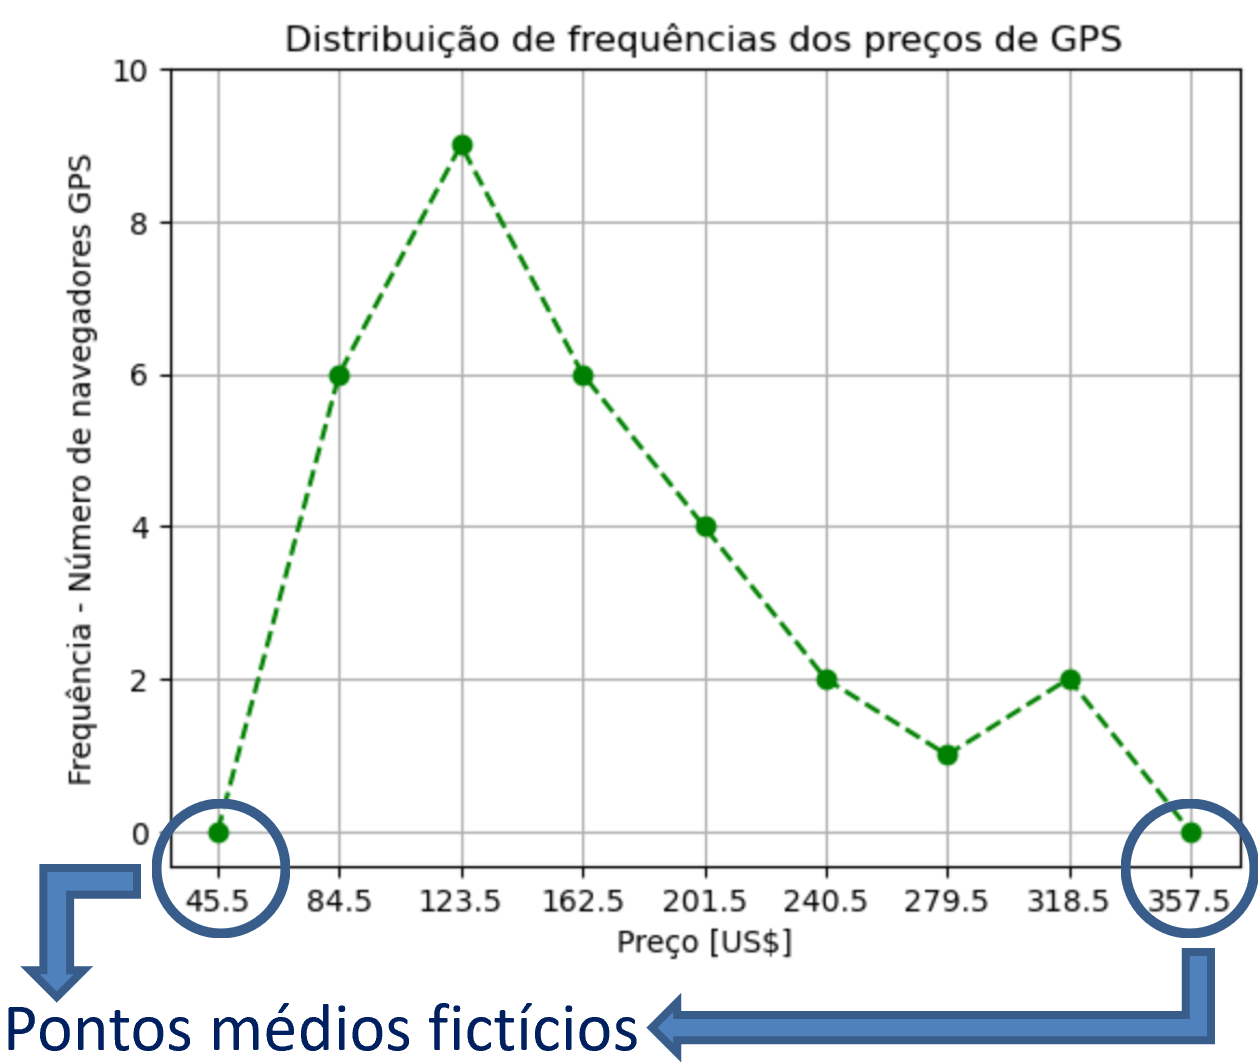

```Python
# Cálculo dos pontos médios fictícios

# Ponto médio fictício à esquerda
fic_esq = [pts_medios[0]-amplitude]
print(f'Ponto médio fictício à esquerda = {fic_esq[0]}')

# Ponto médio fictício à direita
fic_dir = [pts_medios[-1]+amplitude]
print(f'Ponto médio fictício à direita = {fic_dir[0]}')
```

In [31]:
# Cálculo dos pontos médios fictícios
# Ponto médio fictício à esquerda

# Ponto médio fictício à direita


```Python
# Construção dos dados com inserção dos pontos médios fictícios

# Adicionando os pontos médios fictícios à direita e esquerda na lista do eixo x
x_data = fic_esq + list(nova_dist_freq['Pontos médios']) + fic_dir
print(f'Valores para eixo x: {x_data}')

# Adicionando os correspondentes pontos de zero dos pontos médios fictícios à direita e esquerda na lista do eixo y
y_data = [0] + list(nova_dist_freq['Frequência']) + [0]
print(f'Valores para eixo y: {y_data}')
```

In [32]:
# Construção dos dados com inserção dos pontos médios fictícios

# Adicionando os pontos médios fictícios à direita e esquerda na lista do eixo x

# Adicionando os correspondentes pontos de zero dos pontos médios fictícios à direita e esquerda na lista do eixo y


```Python
# Plotagem do polígono de frequências, com diversos atributos
plt.plot(x_data, y_data,'go--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência - Número de navegadores GPS')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.yticks(range(0, nova_dist_freq['Frequência'].max()+2, 2))
plt.grid()
```` 

In [33]:
# Plotagem do polígono de frequências, com diversos atributos


```Python
# Plotagem do polígono de frequências com frequências relativas
y_data_rel = [y/sum(y_data) for y in y_data]
plt.plot(x_data, y_data_rel,'ro--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência relativa')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.grid()
```

In [34]:
# Plotagem do polígono de frequências com frequências relativas
